In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from web_scraping import filter_df

### Importa risultati

Importiamo i dati salvati in `results/bond_info_extracted.csv`, dove sono contenuti anche i volumi mensili di acquisto (mediani, minimo e massimo).

In [2]:
df_results = pd.read_csv('results/bond_info_extracted.csv', index_col=0)

df_results.head()

,Numero Contratti,Volume Ultimo,Volume totale,Prezzo ufficiale,Rendimento effettivo a scadenza netto,Rendimento effettivo a scadenza lordo,Duration modificata,Scadenza,anni_scadenza,median_monthly_volume_million,min_monthly_volume_million,max_monthly_volume_million,ratings
AT0000A2HLC4,201.0,4000.0,3730000.0,35.98849,2.53,2.76,41.32,30/06/20,-4.73,125.70,70.34,208.32,100
AT0000A1XML2,29.0,1000.0,342000.0,66.96416,2.87,3.24,30.43,20/09/17,-7.51,45.47,23.76,71.24,99
AT0000A2QRW0,3.0,10000.0,22000.0,99.78183,0.00,0.00,0.00,20/04/25,0.08,13.01,3.95,27.90,98
DE0001102382,7.0,28000.0,302000.0,99.52604,2.07,2.19,0.40,15/08/25,0.40,12.89,6.48,17.77,97
DE0001102481,7.0,32000.0,136000.0,46.93393,3.03,3.03,24.67,15/08/50,25.42,7.14,4.20,12.14,96


### Distribuzione dei volumi medi mensili

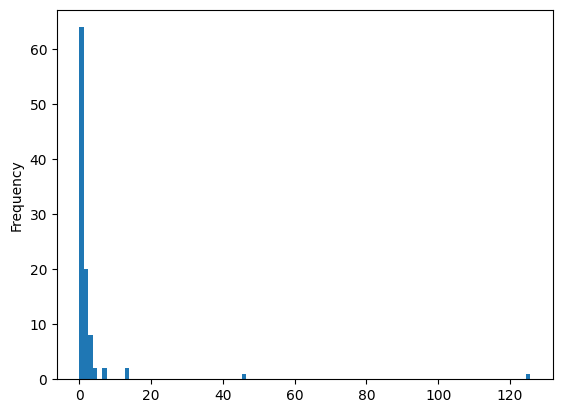

In [3]:
(df_results['median_monthly_volume_million']).plot(kind='hist', bins=100)
plt.show()

### Filtra dataframe 
A titolo di esempio, filtriamo i bond:
- con scadenza compresa tra 2 e 7 anni
- con prezzo inferiore a 100
- escludiamo BTP e titoli della Romania

Ordiniamo il risultato per volume mediano mensile (in ordine decrescente come opzione di default). 

In [4]:
sub_df = filter_df(df_results,
                   anni_scadenza_min=2,
                   anni_scadenza_max=7,
                   prezzo_max=100,
                   ncontratti_min=0,
                   sort_by = "median_monthly_volume_million",
                   escludi_BTP=True,
                   escludi_romania=True)

In [5]:
sub_df.head(20)

,Numero Contratti,Volume Ultimo,Volume totale,Prezzo ufficiale,Rendimento effettivo a scadenza netto,Rendimento effettivo a scadenza lordo,Duration modificata,Scadenza,anni_scadenza,median_monthly_volume_million,min_monthly_volume_million,max_monthly_volume_million,ratings
DE0001102457,9.0,10000.0,153000.0,93.67238,2.17,2.21,3.31,15/08/28,3.40,2.69,1.08,14.15,87
AT0000A2VB47,9.0,20000.0,163000.0,91.77909,2.45,2.46,3.49,20/10/28,3.58,2.62,1.26,5.68,84
BE0000351602,2.0,15000.0,75000.0,94.26947,2.33,2.33,2.52,22/10/27,2.59,2.16,1.08,3.77,77
DE0001102424,3.0,49000.0,70000.0,96.20732,2.08,2.15,2.33,15/08/27,2.40,2.01,0.59,6.47,74
DE0001030740,0.0,0.0,0.0,97.90000,1.98,2.15,2.47,15/10/27,2.57,1.88,0.32,6.21,71
DE0001102465,2.0,75000.0,90000.0,92.64877,2.21,2.25,3.80,15/02/29,3.91,1.67,0.84,4.12,69
DE0001102440,5.0,14000.0,84000.0,95.37571,2.11,2.18,2.82,15/02/28,2.90,1.47,0.68,4.15,67
DE0001102499,2.0,25000.0,38000.0,89.17000,2.36,2.36,4.79,15/02/30,4.91,1.44,0.70,5.72,65
AT0000A1VGK0,4.0,15000.0,31000.0,96.52818,2.24,2.31,2.01,20/04/27,2.08,1.41,0.38,2.62,64
DE0001102473,0.0,0.0,0.0,90.54286,2.31,2.31,4.30,15/08/29,4.40,1.25,0.68,3.20,62
